In [1]:
# ##### setting
# ### set filename you want to analysis
# filepath = None

# if filepath == None:
#     import os
#     import smooziee
#     filepath = os.path.join(os.path.dirname(smooziee.__file__), 'data', 'PbTe_sq_GX711_p0p25_RT_4')
    
# filename = os.path.basename(filepath)


In [2]:
##### import
# from smooziee.smooziee.fitting import Fitting
# from smooziee.smooziee.peak_search import PeakSearch
from smooziee.smooziee import fitting
from smooziee.smooziee import peak_search
import imp
imp.reload(fitting)
imp.reload(peak_search)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lmfit


In [3]:
import pickle
with open('pksearch.pickle', 'rb') as f:
    processor = pickle.load(f) 

print(processor.x.shape)
print(processor.y.shape)
print(processor.ix_peaks)
print(processor.ix_peak_pairs)

(73,)
(73,)
[7, 15, 21, 28, 36, 47, 55]
[[7, 36], [15, 28]]


In [4]:
# class PeakSearch():
#     def __init__(self, x, ix_peaks, ix_peakpairs):
#         self.x = x
#         self.ix_peaks = ix_peaks
#         self.ix_peakpairs = ix_peakpairs

# peaksearch = PeakSearch(processor.x,
#                         processor.ix_peaks,
#                         processor.ix_peak_pairs)

n_peaks = 8

fit = fitting.Fitting("/home/kondo/data/ixs_phonon/data/PbTe_sq_GL711_p0p55_RT_1.pkl",
                      ['lorentzian' for i in range(n_peaks)])


In [5]:
fit.set_params_vary(range(n_peaks), ['center'], vary=False)

In [6]:
# fit.params.pretty_print()

In [7]:
fit.fit(processor.x, processor.y, set_bestparams=True)

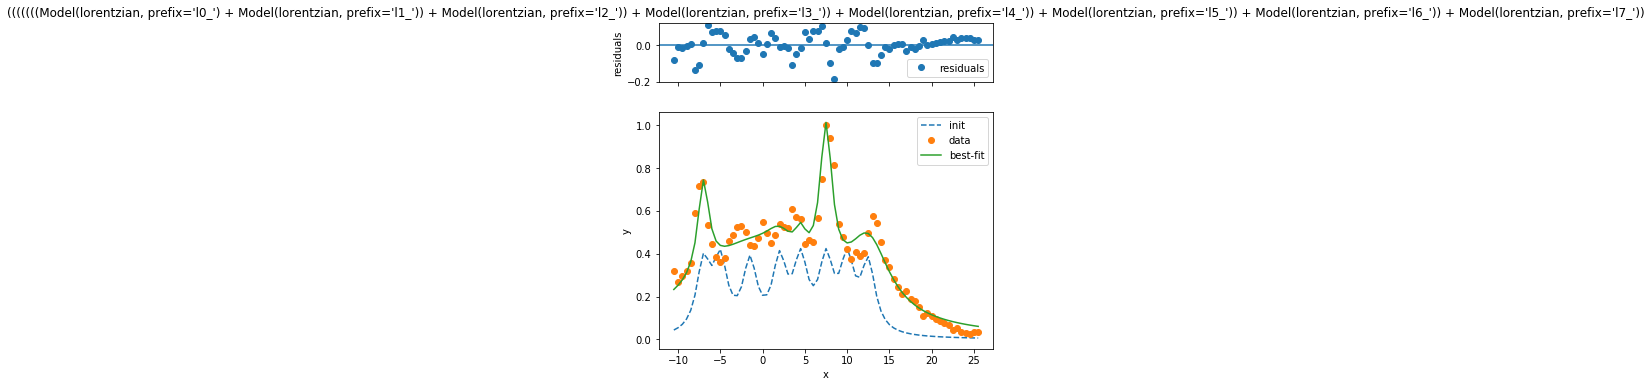

In [8]:
fit.plot(show_init=True)

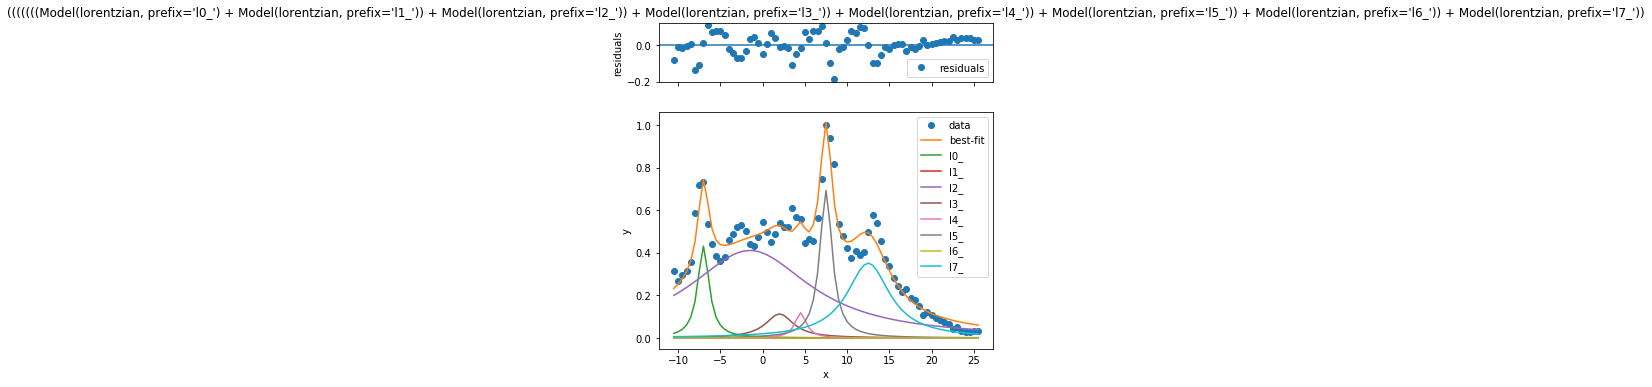

In [9]:
fit.plot_evalcomponents()

In [10]:
fit.set_params_vary(None, None, vary=True, all_param=True)

In [11]:
# fit.result.params.pretty_print()

In [12]:
fit.fit(processor.x, processor.y, set_bestparams=True)

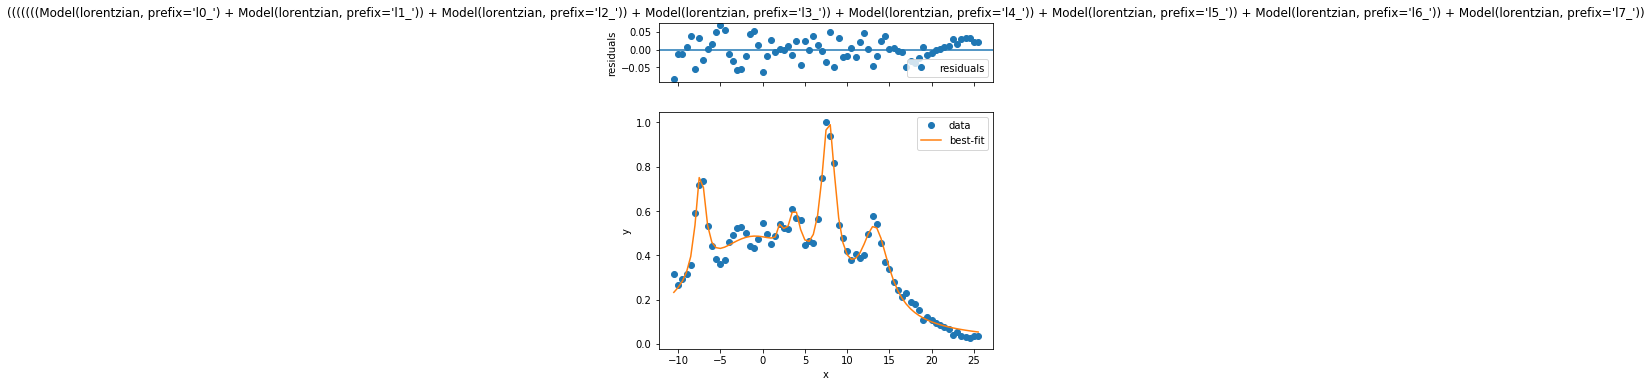

In [13]:
fit.plot()

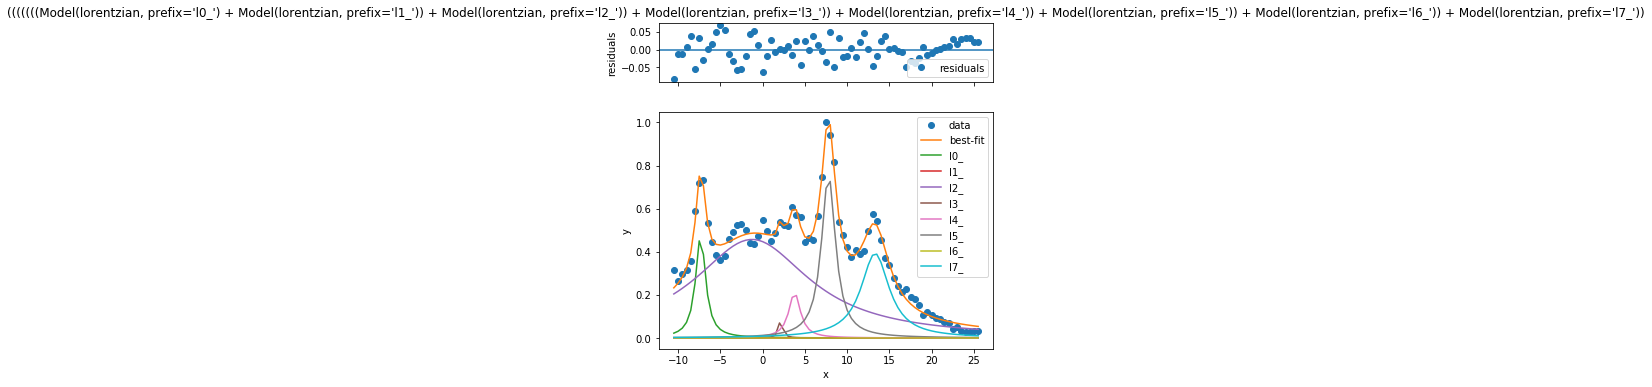

In [14]:
fit.plot_evalcomponents()

In [15]:
fit.params['l0_sigma'].set(min=1e-8)